In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv(r'C:/Users/Narevayin/Documents/ML/DATA/Employees.csv')
df

,Gender,Experience,Salary
0,Female,15,78200
1,Female,12,66400
2,Female,15,61200
3,Female,3,61000
4,Female,4,60000
...,...,...,...
203,Male,39,148000
204,Male,34,190000
205,Male,36,194000
206,Male,32,176000


In [41]:
df.describe()

,Experience,Salary
count,208.000000,208.000000
mean,12.048077,79843.846154
std,7.314706,22512.307844
min,2.000000,53400.000000
25%,7.000000,66000.000000
50%,10.000000,74000.000000
75%,16.000000,88000.000000
max,39.000000,194000.000000


In [42]:
df.count()

Gender        208
Experience    208
Salary        208
dtype: int64

In [43]:
df.isna().sum()

Gender        0
Experience    0
Salary        0
dtype: int64

In [44]:
df['Gender'].replace(['Female','Male'],[1,0], inplace=True)

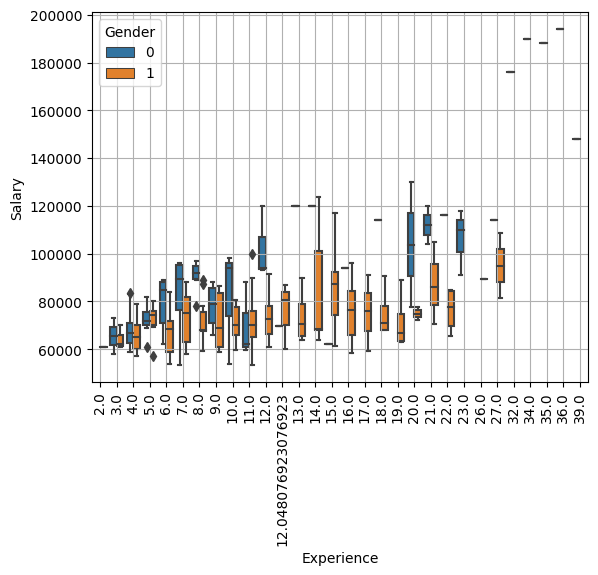

In [67]:
sns.boxplot(x = df['Experience'], y = df['Salary'], hue = df['Gender'])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [54]:
df

,Gender,Experience,Salary
0,1,15,78200
1,1,12,66400
2,1,15,61200
3,1,3,61000
4,1,4,60000
...,...,...,...
203,0,39,148000
204,0,34,190000
205,0,36,194000
206,0,32,176000


In [56]:
df.loc[((df['Experience']> 28) & (df['Salary']<100000)), 'Experience' ] = df['Experience'].mean()

<AxesSubplot: xlabel='Experience', ylabel='Salary'>

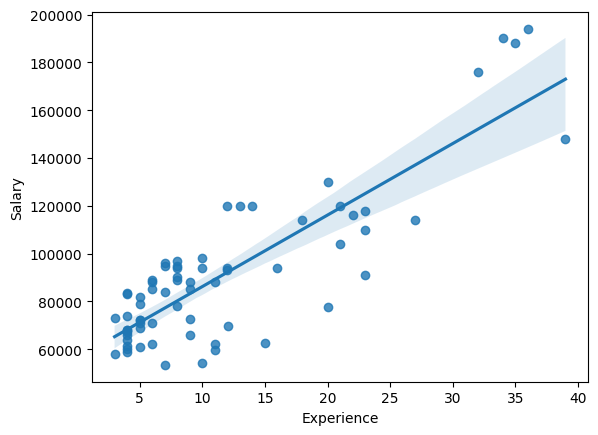

In [63]:
sns.regplot (x = df.loc[df['Gender']==0]['Experience'] ,y = df.loc[df['Gender'] == 0]['Salary'])

<AxesSubplot: xlabel='Experience', ylabel='Salary'>

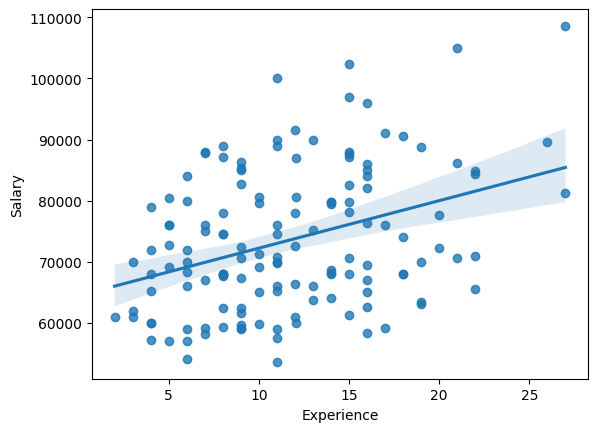

In [75]:
sns.regplot (x = df.loc[df['Gender']==1]['Experience'] ,y = df.loc[df['Gender'] == 1]['Salary'])
# finding anything that seems odd, like a really high experience with small salary

In [74]:
df.loc[((df['Experience']> 10) & (df['Salary']>110000)  & df['Gender'] == 1), 'Salary'] = df['Salary'].mean()
# and replacing anything odd with mean value of the salary

In [77]:
df.corr()

,Gender,Experience,Salary
Gender,1.000000,0.004763,-0.374509
Experience,0.004763,1.000000,0.626799
Salary,-0.374509,0.626799,1.000000


In [81]:
correlation = df.corr()

<AxesSubplot: >

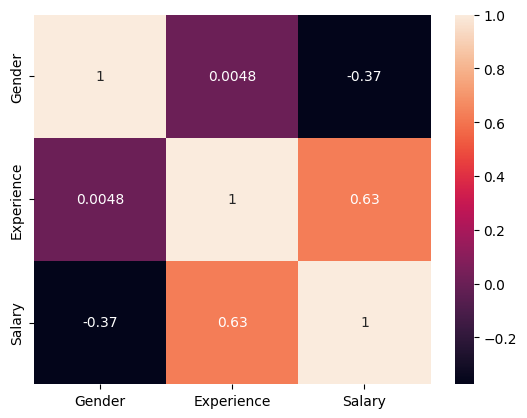

In [83]:
sns.heatmap(df.corr(), xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

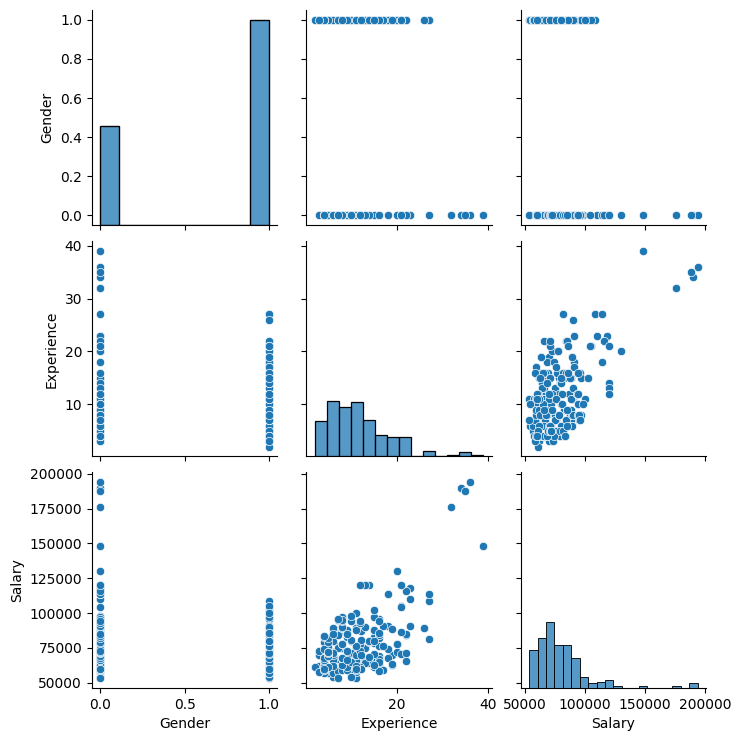

In [84]:
sns.pairplot(df)

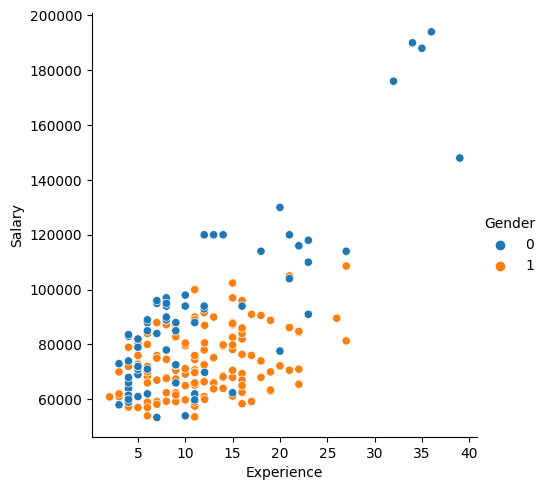

In [86]:
sns.relplot(x= 'Experience', y = 'Salary', hue = 'Gender', data = df)

In [87]:
# this shows that men get paid higher

In [90]:
female = df[df['Gender'] == 1]
female

,Gender,Experience,Salary
0,1,15.000000,78200.000000
1,1,12.000000,66400.000000
2,1,15.000000,61200.000000
3,1,3.000000,61000.000000
4,1,4.000000,60000.000000
...,...,...,...
135,1,11.000000,100000.000000
136,1,14.000000,79843.846154
137,1,16.000000,86000.000000
138,1,15.000000,79843.846154


In [92]:
female = female.drop('Gender', axis = 1)

In [93]:
female

,Experience,Salary
0,15.000000,78200.000000
1,12.000000,66400.000000
2,15.000000,61200.000000
3,3.000000,61000.000000
4,4.000000,60000.000000
...,...,...
135,11.000000,100000.000000
136,14.000000,79843.846154
137,16.000000,86000.000000
138,15.000000,79843.846154


<AxesSubplot: xlabel='Experience'>

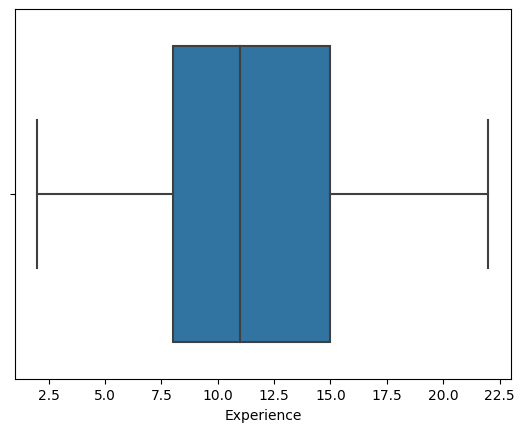

In [121]:
sns.boxplot(x= female['Experience'])
# plt.xlim(25,)

In [118]:
def func(n):
    if n > 25:
        return female['Experience'].mean()
    else:
        return n

In [119]:
female['Experience'] = female['Experience'].apply(func)

In [122]:
x = female.drop('Salary', axis = 1)
y = female['Salary']

In [123]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [124]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [125]:
model = LinearRegression()

In [126]:
model.fit(x_train_scaler, y_train)

LinearRegression()

In [127]:
y_pred = model.predict(x_test_scaler)

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
print(mean_squared_error(y_test, y_pred))

86464573.85276856


In [130]:
from sklearn.metrics import r2_score


In [131]:
print(r2_score(y_test, y_pred))

0.16096509555779182
